# Apply power Transformation 

Source: [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer

In [3]:
# from tqdm import notebook as tqdm

# from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 6, 2 # 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

import seaborn as sns
sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])


######### LoadDicts

# import json
# from glob import glob
# from typing import Any
# from typing import NewType

# def np_encoder(object):
#     if isinstance(object, np.generic):
#         return object.item()


# DictsPathType = NewType("DictsPath", str)


# def load_file_json(path: DictsPathType):
#     with open(path, "r") as f:
#         return json.load(f)


# def dump_file_json(path: DictsPathType, var: Any):
#     with open(path, "w") as f:
#         return json.dump(var, f, indent=4, default=np_encoder)


# class LoadDicts:
#     def __init__(
#         self, dict_path: DictsPathType = "./data", ignore_errors: bool = False
#     ):
#         Dicts_glob = Path().glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         self.not_attr = []
#         for path_json in Dicts_glob:
#             try:
#                 name = path_json.as_posix().split("/")[-1].replace(".json", "")
#                 self.List.append(name)
#                 self.Dict[name] = load_file_json(path_json)
#                 if name.isidentifier() and not iskeyword(name):
#                     setattr(self, name, self.Dict[name])
#                 else:
#                     self.not_attr.append(name)
#             except Exception as e:
#                 print(f"Error trying to load the file: {path_json.absolute()}: ")
#                 if not ignore_errors:
#                     raise e
#                 print(e)
                
#     def __len__(self):
#         return len(self.List)
    
#     def items(self):
#         for item in self.List:
#             yield item, self.Dict[item]

#     def __repr__(self) -> str:
#         return "LoadDicts: {}".format(", ".join(self.List))

In [4]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.11.10
IPython version      : 8.27.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 6.8.0-44-generic
Machine     : x86_64
Processor   : 
CPU cores   : 20
Architecture: 64bit

Git hash: 2567a478ebf147744980cf5e4a612cf661cced24

Git repo: https://github.com/ysraell/random-forest-mc-utils.git

Git branch: main

seaborn   : 0.13.2
numpy     : 1.26.4
pandas    : 2.2.2
matplotlib: 3.9.2

CPU	: 12th Gen Intel(R) Core(TM) i7-12700
Mem:            15G
Swap:          3.7G


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

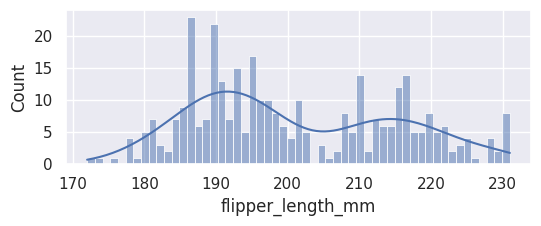

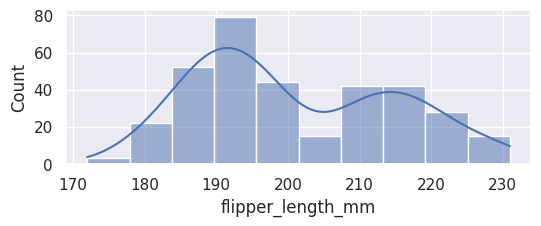

In [5]:
penguins = sns.load_dataset("penguins")
plt.figure()
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, bins=penguins["flipper_length_mm"].nunique())
plt.figure()
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

In [6]:
dataset_path = '/work/tmp/credit-card-fraud-prediction'

In [7]:
!ls $dataset_path

model_tuning2_64trees_20240914_2326.json
model_tuning3_256trees_20240915_1729.json
model_tuning_320trees_20240914_2145.json
sample_submission.csv
submission_exp1.csv
test.csv
train.csv
trees_metrcis_sim2_20240915_1804.json
trees_metrcis_sim_20240915_1425.json


In [9]:
df_train = pd.read_csv(f'{dataset_path}/train.csv')
df_test = pd.read_csv(f'{dataset_path}/test.csv')

In [10]:
df_train = df_train.drop(columns='Time')
df_test = df_test.drop(columns='Time')

In [11]:
df_train['Transaction_Amount'] = (df_train['Transaction_Amount'] * 100).astype(np.uint32)
df_test['Transaction_Amount'] = (df_test['Transaction_Amount'] * 100).astype(np.uint32)

In [12]:
feat_cols = df_train.columns.to_list()
feat_cols.remove('id')
feat_cols.remove('IsFraud')
feat_cols

['feat1',
 'feat2',
 'feat3',
 'feat4',
 'feat5',
 'feat6',
 'feat7',
 'feat8',
 'feat9',
 'feat10',
 'feat11',
 'feat12',
 'feat13',
 'feat14',
 'feat15',
 'feat16',
 'feat17',
 'feat18',
 'feat19',
 'feat20',
 'feat21',
 'feat22',
 'feat23',
 'feat24',
 'feat25',
 'feat26',
 'feat27',
 'feat28',
 'Transaction_Amount']

In [14]:
df = pd.concat([df_train[feat_cols], df_test[feat_cols]], ignore_index=True)

/tmp/ipykernel_77/2613786336.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


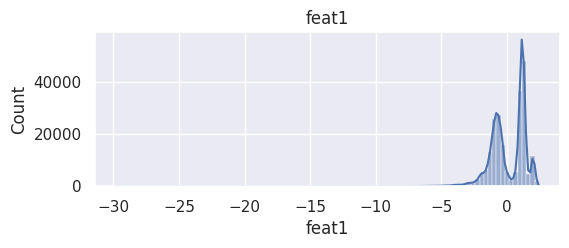

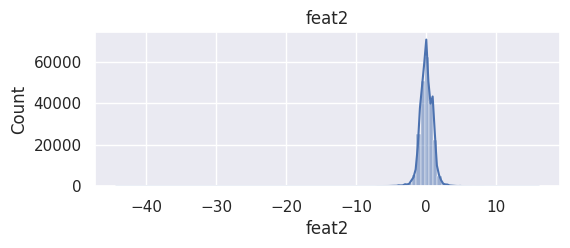

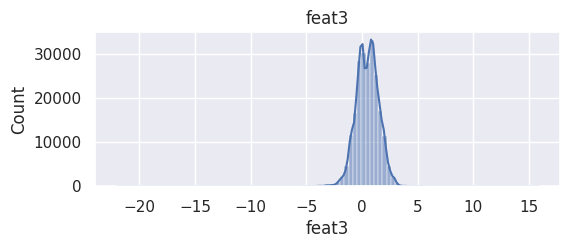

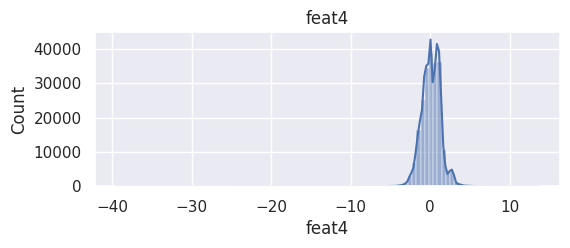

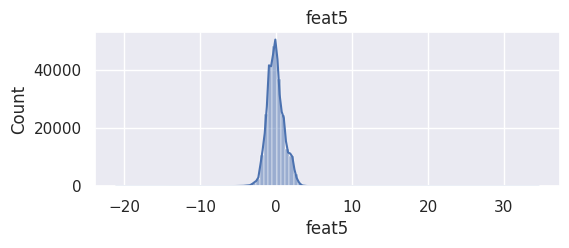

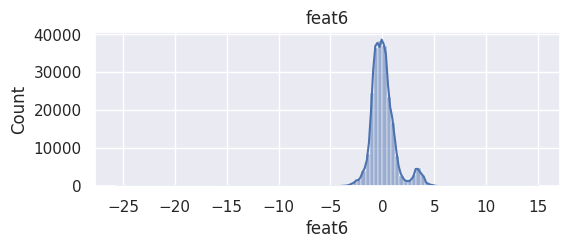

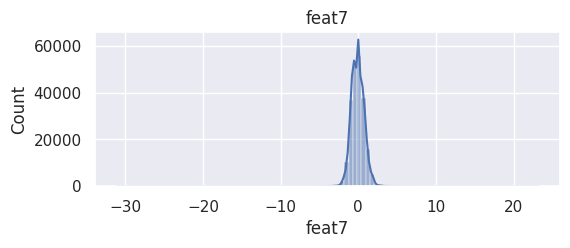

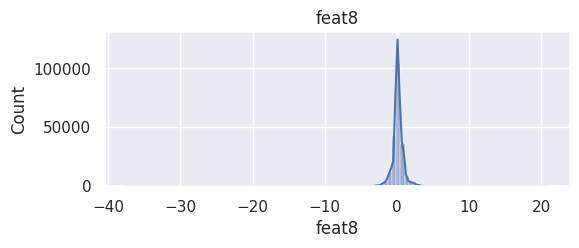

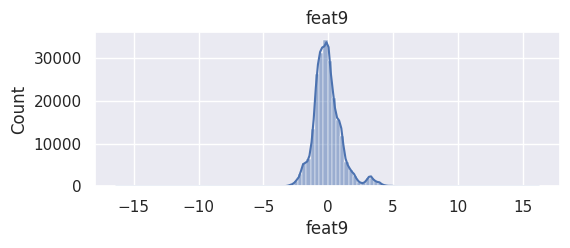

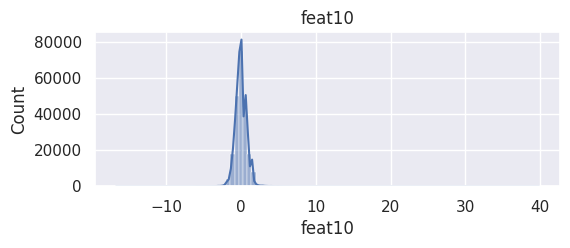

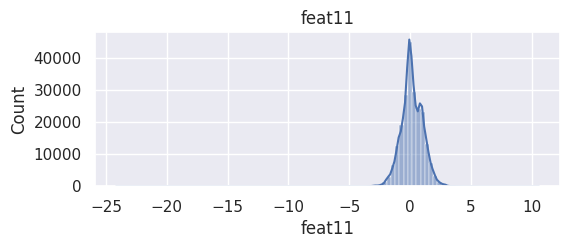

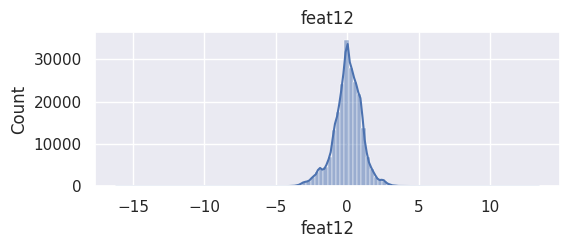

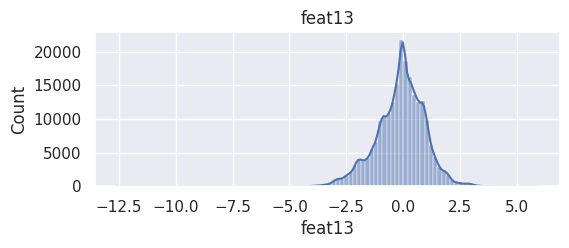

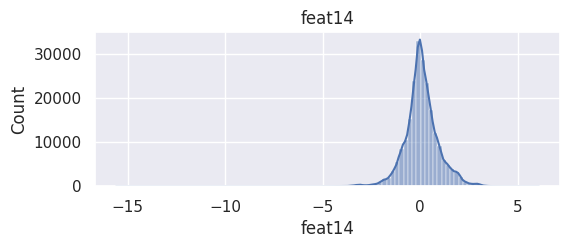

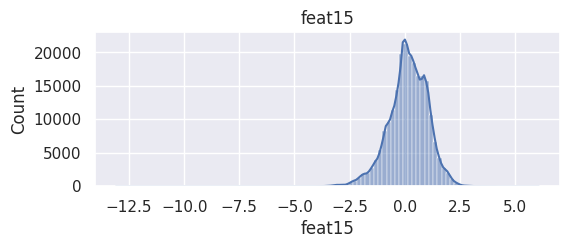

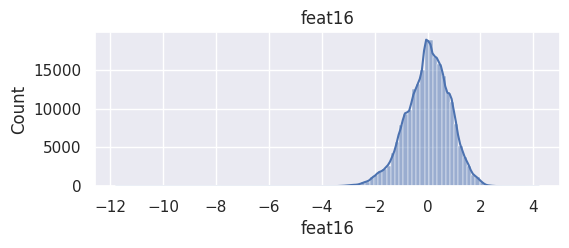

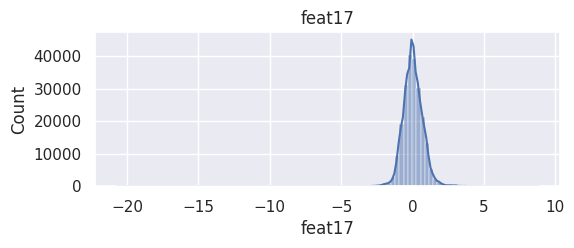

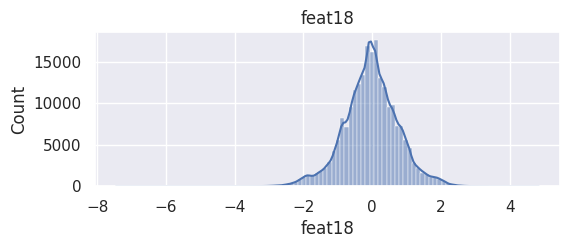

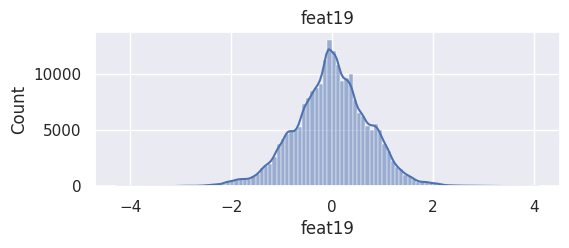

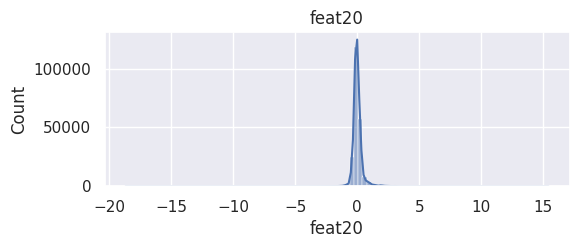

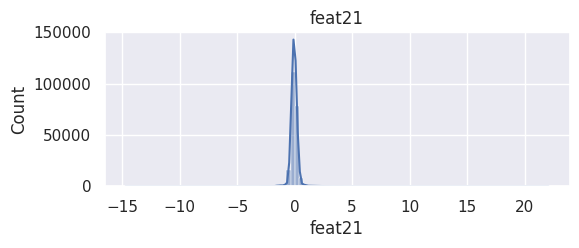

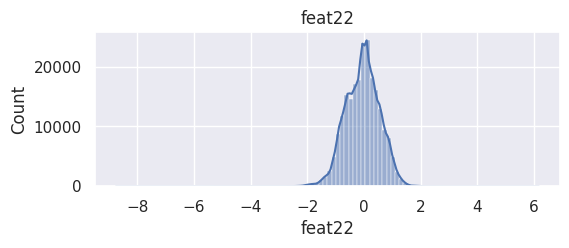

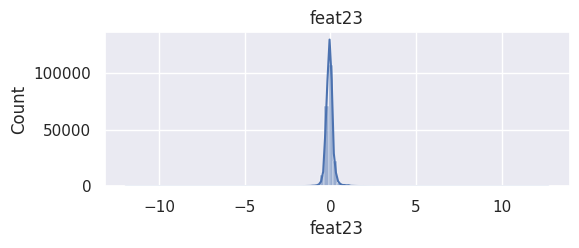

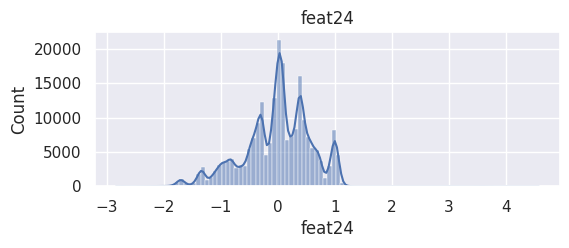

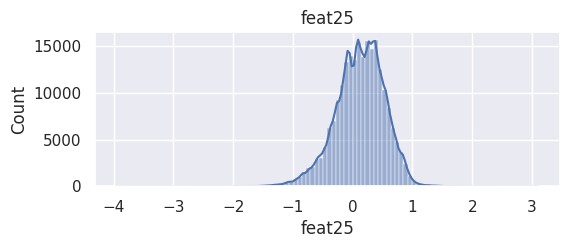

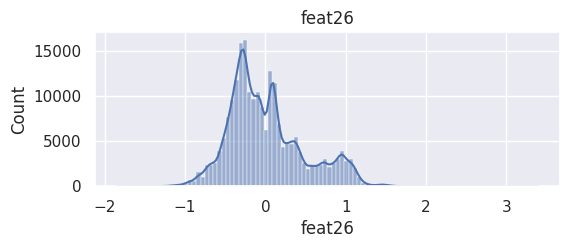

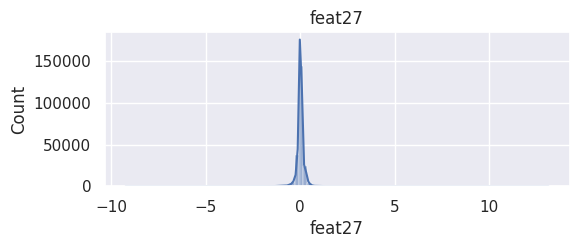

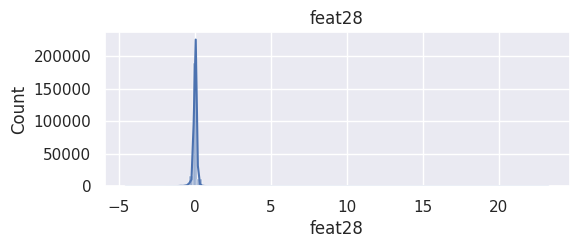

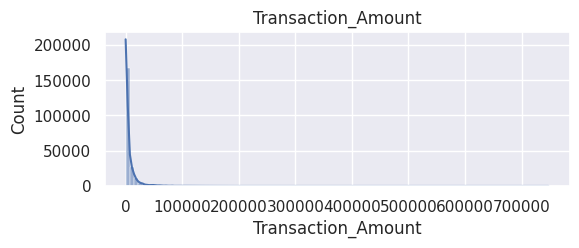

In [17]:
for feat_col in feat_cols:
    plt.figure()
    sns.histplot(data=df, x=feat_col, kde=True, bins=min(df_train[feat_col].nunique(), 100))
    plt.title(feat_col)
    plt.autoscale()
    

# Transformation

In [38]:
columns = ['id']+feat_cols+['ds']
df_train['ds'] = 'train'
df_test['ds'] = 'test'
df = pd.concat([df_train[columns], df_test[columns]], ignore_index=True)

In [66]:
df.nunique()

id                    219129
feat1                 217617
feat2                 217707
feat3                 217656
feat4                 217676
feat5                 217677
feat6                 217553
feat7                 217702
feat8                 217631
feat9                 217585
feat10                217667
feat11                217612
feat12                217666
feat13                217700
feat14                217663
feat15                217698
feat16                217685
feat17                217674
feat18                217595
feat19                217633
feat20                217528
feat21                217540
feat22                217635
feat23                217522
feat24                217519
feat25                217599
feat26                217611
feat27                217363
feat28                217259
Transaction_Amount     18999
ds                         2
dtype: int64

In [69]:
qt = QuantileTransformer(n_quantiles=100000, random_state=0, subsample=217000)
Y = qt.fit_transform(df[feat_cols].to_numpy())

In [70]:
df_trans = pd.concat([df['id'], pd.DataFrame(Y, columns=feat_cols), df['ds']], axis=1)
df_trans

,id,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,ds
0,0,0.985919,0.431199,0.048401,0.583308,0.481508,0.076452,0.608300,0.185993,0.817658,...,0.100013,0.079615,0.959700,0.354821,0.141981,0.731060,0.188562,0.150594,0.155087,train
1,1,0.968326,0.061304,0.152671,0.185802,0.158309,0.411030,0.109751,0.441174,0.525555,...,0.658429,0.495925,0.862845,0.186147,0.076942,0.113363,0.391229,0.193760,0.791753,train
2,2,0.488324,0.868889,0.242264,0.321074,0.767753,0.123660,0.898149,0.311584,0.567277,...,0.105181,0.107581,0.882845,0.942383,0.065530,0.637736,0.901478,0.809290,0.185122,train
3,3,0.963430,0.402132,0.058571,0.504564,0.476725,0.249222,0.497851,0.366073,0.848340,...,0.394161,0.460455,0.894449,0.402924,0.363504,0.490400,0.233052,0.121091,0.086061,train
4,4,0.601826,0.409744,0.764877,0.853138,0.322136,0.865108,0.134533,0.803847,0.806698,...,0.737863,0.863636,0.692291,0.303708,0.602020,0.342272,0.821699,0.488855,0.086061,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,0.946700,0.482789,0.635031,0.117141,0.002670,0.053935,0.408696,0.979986,0.969050,...,0.262923,0.256931,0.476562,0.914507,0.588197,0.448856,0.240624,0.180632,0.927539,test
219125,219125,0.491267,0.128343,0.229411,0.754758,0.006749,0.014178,0.338803,0.976500,0.131362,...,0.974590,0.997693,0.434614,0.366381,0.006764,0.835440,0.967308,0.989621,0.517660,test
219126,219126,0.982213,0.679197,0.271293,0.445455,0.036369,0.664091,0.638989,0.641462,0.245448,...,0.119682,0.057690,0.954319,0.422145,0.119597,0.720867,0.141393,0.181480,0.142316,test
219127,219127,0.986848,0.645635,0.852133,0.025489,0.049657,0.004620,0.518634,0.795943,0.996771,...,0.750730,0.857209,0.948622,0.888000,0.064845,0.495666,0.679714,0.227132,0.798868,test


In [71]:
df_train_trans = pd.concat([df_trans.query('ds == "train"'), df_train['IsFraud']], axis=1)
df_train_trans = df_train_trans.drop(columns='ds')
df_train_trans

,id,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.985919,0.431199,0.048401,0.583308,0.481508,0.076452,0.608300,0.185993,0.817658,...,0.100013,0.079615,0.959700,0.354821,0.141981,0.731060,0.188562,0.150594,0.155087,0
1,1,0.968326,0.061304,0.152671,0.185802,0.158309,0.411030,0.109751,0.441174,0.525555,...,0.658429,0.495925,0.862845,0.186147,0.076942,0.113363,0.391229,0.193760,0.791753,0
2,2,0.488324,0.868889,0.242264,0.321074,0.767753,0.123660,0.898149,0.311584,0.567277,...,0.105181,0.107581,0.882845,0.942383,0.065530,0.637736,0.901478,0.809290,0.185122,0
3,3,0.963430,0.402132,0.058571,0.504564,0.476725,0.249222,0.497851,0.366073,0.848340,...,0.394161,0.460455,0.894449,0.402924,0.363504,0.490400,0.233052,0.121091,0.086061,0
4,4,0.601826,0.409744,0.764877,0.853138,0.322136,0.865108,0.134533,0.803847,0.806698,...,0.737863,0.863636,0.692291,0.303708,0.602020,0.342272,0.821699,0.488855,0.086061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,0.832732,0.760884,0.115889,0.819026,0.730017,0.293674,0.665077,0.269441,0.590916,...,0.361604,0.375482,0.165189,0.122910,0.965147,0.353386,0.599198,0.661785,0.086061,0
149996,149996,0.526924,0.025482,0.472394,0.274151,0.070041,0.242793,0.433535,0.168666,0.235947,...,0.902310,0.531845,0.217832,0.741296,0.521440,0.126541,0.267915,0.767535,0.968250,0
149997,149997,0.532555,0.330673,0.552246,0.793432,0.470224,0.813068,0.357290,0.719393,0.613137,...,0.912508,0.900199,0.483671,0.295168,0.575336,0.292138,0.670511,0.583116,0.851629,0
149998,149998,0.269002,0.675586,0.970208,0.901288,0.015660,0.858838,0.441814,0.756452,0.890295,...,0.869864,0.993146,0.559395,0.922659,0.025991,0.930459,0.951830,0.247202,0.917004,0


In [72]:
df_test_trans = df_trans.query('ds == "test"').reset_index(drop=True)
df_test_trans = df_test_trans.drop(columns='ds')
df_test_trans

,id,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,0.318355,0.321163,0.462163,0.756566,0.957549,0.668337,0.304175,0.191049,0.590411,...,0.806909,0.180823,0.700434,0.289070,0.800238,0.066284,0.751069,0.019574,0.020359,0.578981
1,150001,0.157953,0.116052,0.442224,0.666073,0.854879,0.038326,0.790019,0.633170,0.608514,...,0.907089,0.774638,0.887381,0.275813,0.141341,0.152846,0.883049,0.963289,0.903018,0.510830
2,150002,0.575795,0.365659,0.487609,0.125266,0.829039,0.255753,0.130055,0.024725,0.674943,...,0.915107,0.977730,0.986178,0.070841,0.231233,0.653077,0.571366,0.596056,0.721636,0.927219
3,150003,0.733706,0.387797,0.233842,0.465443,0.857811,0.882159,0.029470,0.124882,0.819187,...,0.276938,0.376094,0.523755,0.588606,0.187639,0.812250,0.180992,0.763024,0.547735,0.324788
4,150004,0.526584,0.364314,0.677058,0.142279,0.704843,0.753111,0.919480,0.045687,0.613396,...,0.318202,0.551307,0.578053,0.152166,0.463283,0.649355,0.333335,0.530985,0.717708,0.945334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69124,219124,0.946700,0.482789,0.635031,0.117141,0.002670,0.053935,0.408696,0.979986,0.969050,...,0.205887,0.262923,0.256931,0.476562,0.914507,0.588197,0.448856,0.240624,0.180632,0.927539
69125,219125,0.491267,0.128343,0.229411,0.754758,0.006749,0.014178,0.338803,0.976500,0.131362,...,0.338346,0.974590,0.997693,0.434614,0.366381,0.006764,0.835440,0.967308,0.989621,0.517660
69126,219126,0.982213,0.679197,0.271293,0.445455,0.036369,0.664091,0.638989,0.641462,0.245448,...,0.060191,0.119682,0.057690,0.954319,0.422145,0.119597,0.720867,0.141393,0.181480,0.142316
69127,219127,0.986848,0.645635,0.852133,0.025489,0.049657,0.004620,0.518634,0.795943,0.996771,...,0.212513,0.750730,0.857209,0.948622,0.888000,0.064845,0.495666,0.679714,0.227132,0.798868


In [73]:
df_train_trans.to_csv(f'{dataset_path}/train_trans.csv', index=False)
df_test_trans.to_csv(f'{dataset_path}/test_trans.csv', index=False)

/tmp/ipykernel_77/2727721925.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


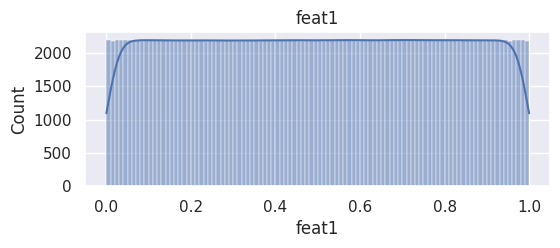

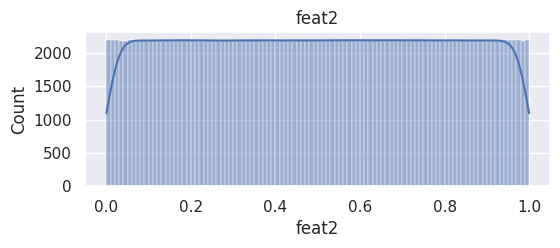

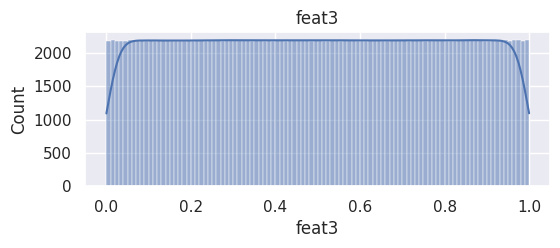

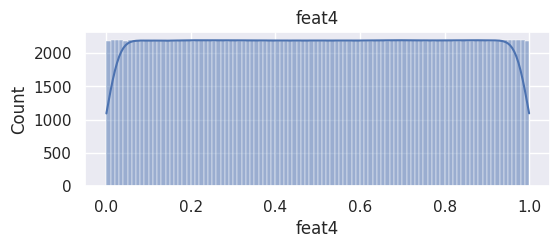

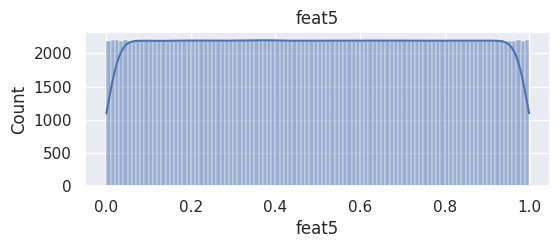

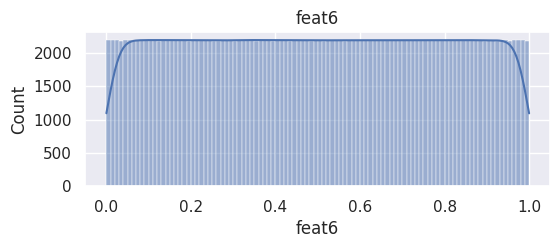

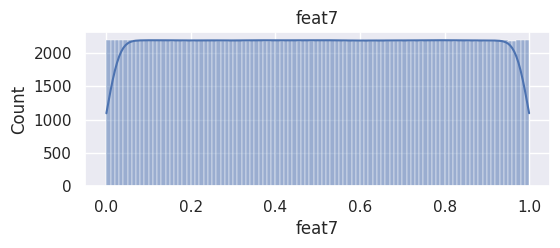

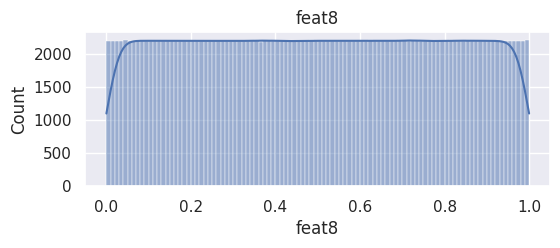

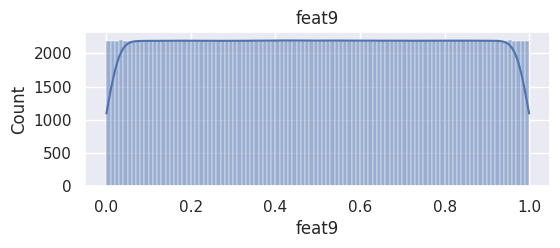

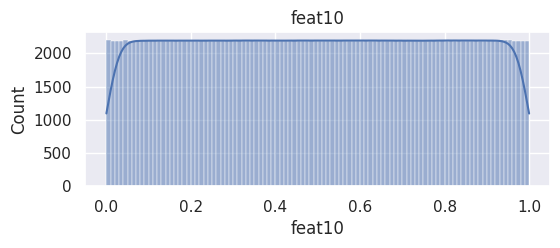

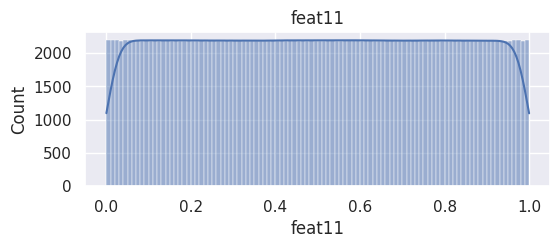

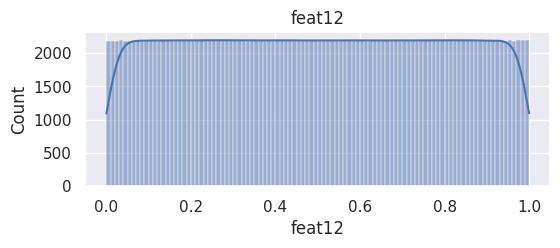

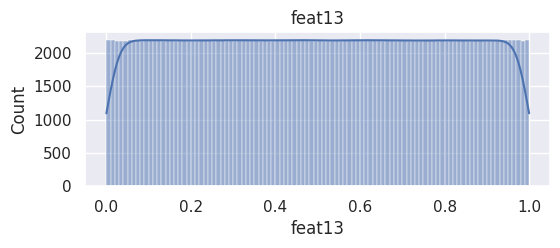

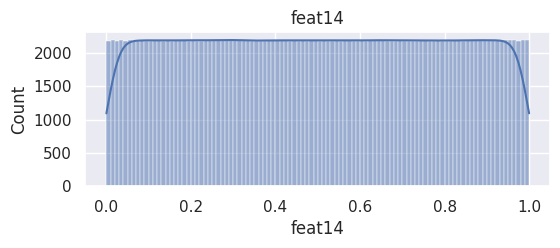

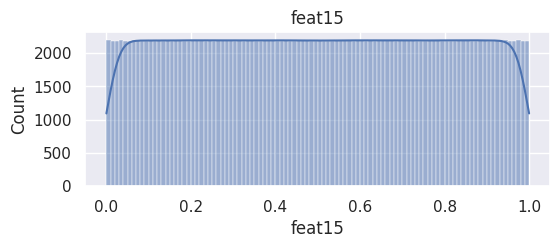

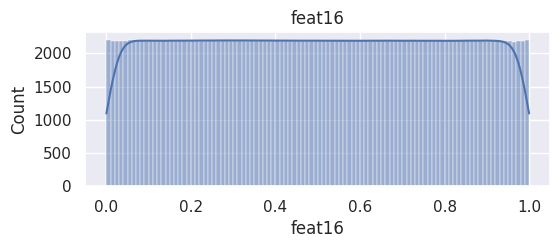

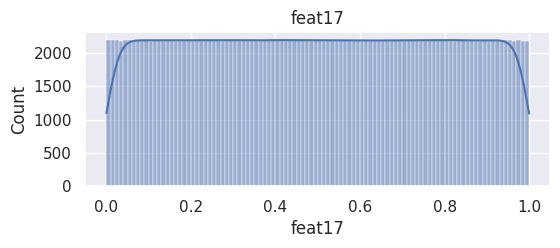

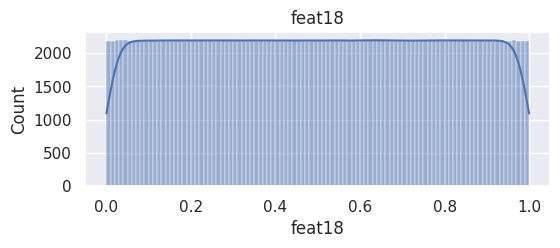

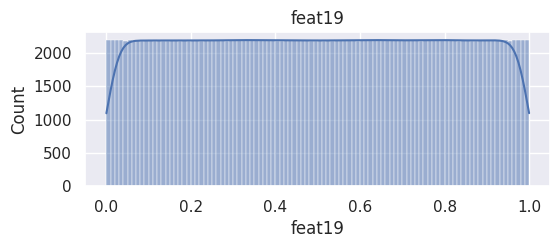

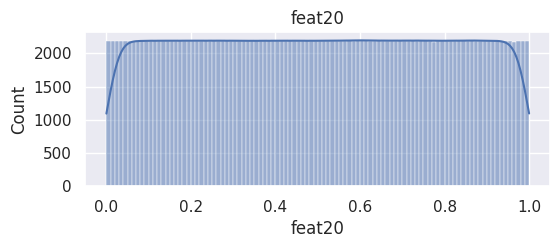

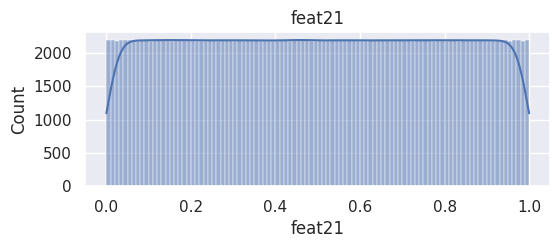

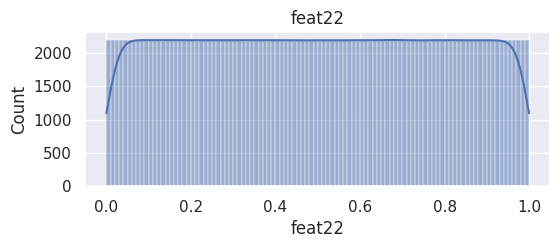

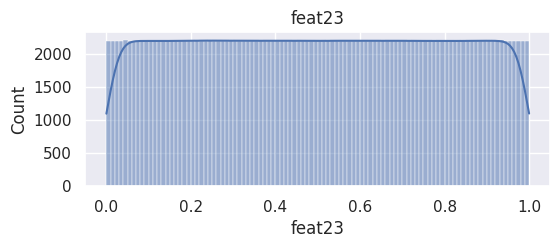

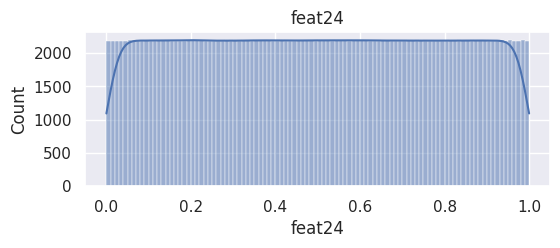

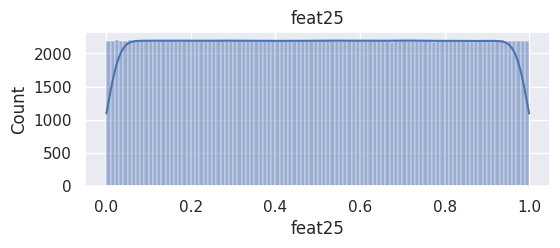

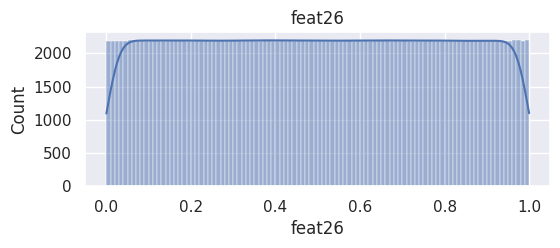

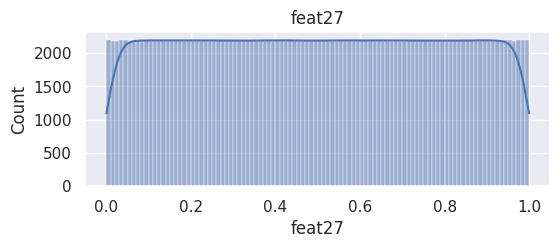

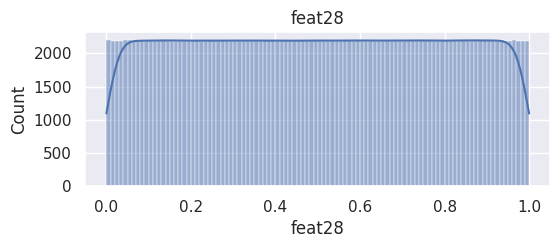

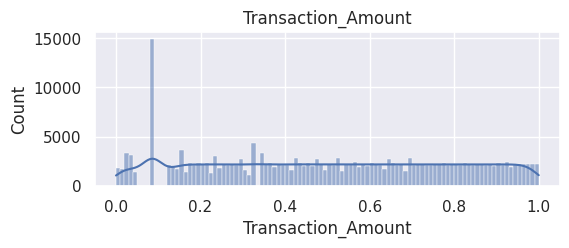

In [74]:
for feat_col in feat_cols:
    plt.figure()
    sns.histplot(data=df_trans, x=feat_col, kde=True, bins=min(df_train[feat_col].nunique(), 100))
    plt.title(feat_col)
    plt.autoscale()